In [3]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [5]:
df_usa=df[df['job_country']=='United States'].copy()


In [6]:
df_usa['job_posted_month']= df_usa['job_posted_date'].dt.strftime('%B') # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior 
                                                                       # %B for full month name and to understand other options go to that link
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,October
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",July
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",April
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,January


In [7]:
df_usa_pivot = df_usa.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_usa_pivot.reset_index(inplace=True)
df_usa_pivot['month_no'] = pd.to_datetime(df_usa_pivot['job_posted_month'], format='%B').dt.month
df_usa_pivot.sort_values('month_no', inplace = True)
df_usa_pivot.set_index('job_posted_month', inplace=True)
df_usa_pivot.drop(columns='month_no', inplace=True)

## analytical jobs data in usa

In [8]:
df_usa_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


## technology jobs data in usa

In [9]:
df_usa_tech_pivot= pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month') #index_col is used to set the index column while reading the csv file
#df_usa_tech_pivot.set_index('job_posted_month', inplace=True) is equal to this index_col='job_posted_month'
df_usa_tech_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


## merge both tech and analytical tables

In [10]:
df_usa_merge= df_usa_pivot.merge(df_usa_tech_pivot, on='job_posted_month') #on is used to specify the column on which we want to merge the two dataframes
#✅✅✅
#----------------------------------------------------------------- this is wrong to set an index after merging ❌❌❌
#new_table= df_usa_pivot.merge(df_usa_tech_pivot)
#new_table
#new_table.set_index('job_posted_month')❌❌❌

In [13]:
df_usa_merge

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [ ]:
top_5= df_usa_merge.sum().sort_values(ascending=False).head().index.to_list()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

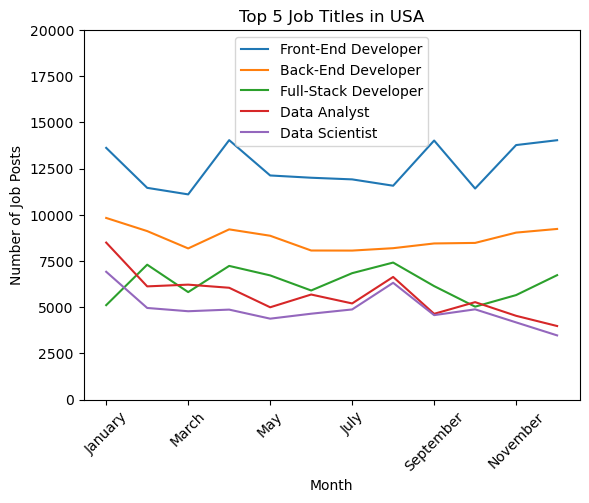

In [12]:
df_usa_merge[top_5].plot(kind='line')
plt.title('Top 5 Job Titles in USA')
plt.ylabel('Number of Job Posts')
plt.ylim(0, 20000)
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()